In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,NaN,-0.061874,NaN,0.33278,0.19027,0.56716,NaN,NaN,0.66126,NaN,3.93810,NaN
4,-0.268400,-1.006000,NaN,1.56160,NaN,NaN,1.52260,0.98475,3.10940,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,NaN,-6.107600,NaN,1.33770,1.41870,1.68610,NaN,NaN,0.12790,NaN,3.36580,NaN
397,-3.479100,NaN,NaN,NaN,NaN,1.47010,NaN,1.84110,3.47730,0.95496,1.52630,NaN
398,7.293000,NaN,NaN,0.39655,NaN,3.41010,NaN,NaN,0.99059,3.43740,NaN,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	39
float64		column 2	79
float64		column 3	65
float64		column 4	105
float64		column 5	91
float64		column 6	66
float64		column 7	105
float64		column 8	78
float64		column 9	53
float64		column 10	78
float64		column 11	78
float64		column 12	105


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,361.000000,321.000000,335.000000,295.000000,309.000000,334.000000,295.000000,322.000000,347.000000,322.000000,322.000000,295.000000
mean,-0.067997,0.117708,2.047075,1.895725,1.911728,1.953672,1.990494,1.962389,1.989545,1.999948,1.962430,1.924247
std,2.617708,2.811436,1.130703,1.125544,1.156798,1.132171,1.159856,1.123211,1.144626,1.147488,1.142301,1.193463
min,-7.771000,-6.828400,0.005583,0.005376,0.036095,0.018503,0.003618,0.013093,0.007019,0.067105,0.030430,0.001972
25%,-0.691150,-0.780550,1.130500,0.971745,0.877200,0.993548,0.971825,1.038375,1.084900,1.013975,0.973285,0.844900
50%,-0.054071,0.008106,2.093200,1.782900,1.867200,2.005400,2.061700,1.963250,2.136900,2.088500,1.913900,1.886400
75%,0.794360,0.956710,2.998950,2.784100,2.900200,2.926875,2.961600,2.942050,2.935950,2.985950,2.959800,2.947400
max,8.409300,6.777100,3.976400,3.992700,3.979000,3.974900,3.996300,3.995000,3.978100,3.962700,3.967600,3.996000


<AxesSubplot:>

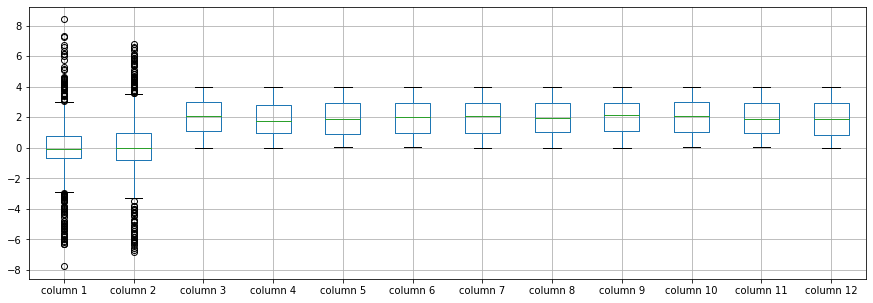

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.067997
column 2     0.117708
column 3     2.047075
column 4     1.895725
column 5     1.911728
column 6     1.953672
column 7     1.990494
column 8     1.962389
column 9     1.989545
column 10    1.999948
column 11    1.962430
column 12    1.924247
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.061605,-0.116984,-0.051635,0.004714,-0.035845,-0.026441,0.071910,-0.036918,0.045869,0.095717,-0.030748
column 2,0.061605,1.000000,-0.008514,0.066233,-0.081361,-0.098271,-0.018264,-0.034165,-0.057240,0.001074,-0.087746,0.052837
column 3,-0.116984,-0.008514,1.000000,0.021957,-0.091993,-0.098315,-0.070706,0.034781,0.123891,-0.029950,-0.051198,-0.004805
column 4,-0.051635,0.066233,0.021957,1.000000,0.024819,0.090397,0.034150,0.111319,0.018831,0.033514,-0.037260,-0.053803
column 5,0.004714,-0.081361,-0.091993,0.024819,1.000000,0.047789,0.109365,0.045621,-0.029536,0.023028,-0.006128,-0.033580
column 6,-0.035845,-0.098271,-0.098315,0.090397,0.047789,1.000000,0.042817,0.067452,-0.010389,0.001452,0.032405,0.017111
column 7,-0.026441,-0.018264,-0.070706,0.034150,0.109365,0.042817,1.000000,-0.007481,0.095219,0.083425,0.091351,-0.044347
column 8,0.071910,-0.034165,0.034781,0.111319,0.045621,0.067452,-0.007481,1.000000,-0.008583,-0.135319,-0.053579,-0.041082
column 9,-0.036918,-0.057240,0.123891,0.018831,-0.029536,-0.010389,0.095219,-0.008583,1.000000,-0.009682,0.065094,0.108145
column 10,0.045869,0.001074,-0.029950,0.033514,0.023028,0.001452,0.083425,-0.135319,-0.009682,1.000000,0.010480,0.074998


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+28,12+28+28,12+28+28+28,12+28+28+28+28,12+28+28+28+28+28,12+28+28+28+28+28+28,12+28+28+28+28+28+28+28,12+28+28+28+28+28+28,12+28+28+28+28+28,12+28+28+28+28,12+28+28+28,12+28+28,12+28,12], vae_layer = False, seed = 28)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.35240966796875
Epoch: 1 , loss: 22.381258850097655
Epoch: 2 , loss: 22.269211959838866
Epoch: 3 , loss: 22.202638702392576
Epoch: 4 , loss: 22.077389373779297
Epoch: 5 , loss: 21.745874404907227
Epoch: 6 , loss: 20.174985122680663
Epoch: 7 , loss: 18.778929862976074
Epoch: 8 , loss: 18.401136207580567
Epoch: 9 , loss: 18.110701599121093
Epoch: 10 , loss: 18.05836193084717
Epoch: 11 , loss: 17.79606201171875
Epoch: 12 , loss: 17.643163146972658
Epoch: 13 , loss: 17.447847175598145
Epoch: 14 , loss: 17.18639835357666
Epoch: 15 , loss: 17.2156254196167
Epoch: 16 , loss: 16.87387035369873
Epoch: 17 , loss: 17.26842212677002
Epoch: 18 , loss: 16.855261764526368
Epoch: 19 , loss: 17.01776123046875
Epoch: 20 , loss: 16.94171012878418
Epoch: 21 , loss: 16.849300079345703
Epoch: 22 , loss: 16.83545253753662
Epoch: 23 , loss: 16.669773826599123
Epoch: 24 , loss: 16.63885009765625
Epoch: 25 , loss: 16.56313972

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.016529
column 5     2.003830
column 6     2.245800
column 7     2.074152
column 8     2.227200
column 9     1.943500
column 10    2.099998
column 11    2.072643
column 12    1.992619
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.495873,0.000000,0.781477,0.000000,0.000000,0.000000,-0.528493,-1.245926,0.0,-1.996678,0.000000,-2.659342
4,0.000000,0.000000,-2.064564,0.000000,-2.457785,-2.601335,0.000000,0.000000,0.0,-2.882070,-3.149162,-0.195163
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
396,-0.297963,0.000000,-2.614320,0.000000,0.000000,0.000000,0.142525,-2.558953,0.0,0.695349,0.000000,-2.594722
397,0.000000,2.124437,0.074539,-0.478357,-1.250380,0.000000,0.400181,0.000000,0.0,0.000000,0.000000,-0.818807
398,0.000000,0.477325,-1.241793,0.000000,-1.856692,0.000000,-1.767103,0.920769,0.0,0.000000,-0.634761,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(52.72028980870921, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.32289364765364253

In [18]:
new_df.iloc[66,:]

column 1    -0.081414
column 2     0.267760
column 3     2.162501
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.075464
column 8     2.069754
column 9     1.538100
column 10    2.112905
column 11    0.853340
column 12    1.996152
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.886600,2.469600,0.215410,3.090000,0.78343,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.434300,3.129900,1.277800,1.428500,0.143330,1.19480,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.768200,1.210000,3.996300,2.217300,3.90290,1.514400,2.438900,0.633580
3,-0.043287,-0.061874,1.146337,0.332780,0.190270,0.567160,1.131607,1.106774,0.66126,1.138422,3.938100,1.075258
4,-0.268400,-1.006000,0.817636,1.561600,0.743615,0.776065,1.522600,0.984750,3.10940,0.774330,0.768038,0.751897
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.882690,0.354060,1.627800,3.294000,1.08500,0.157400,0.465040,2.851400
396,-0.033333,-6.107600,1.291080,1.337700,1.418700,1.686100,1.237625,1.234647,0.12790,1.237839,3.365800,1.160878
397,-3.479100,0.131137,1.399339,1.293743,1.300520,1.470100,1.325581,1.841100,3.47730,0.954960,1.526300,1.304993
398,7.293000,0.065855,1.253007,0.396550,1.142308,3.410100,1.184497,1.198769,0.99059,3.437400,1.181439,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AW_20(imp).xlsx", index=False, header=False)